# Testing Gaussian Classifier on Clusters

This is an updated, cleaned up code for GaussianNB Classifier Final. See that notebook for steps if this is confusing.
Checking how the decision boundary behaves when a Gaussian NB Classifier is implemented. We expect ellipsoids, but get lines in the first few examples because of how the data is split. A curve is seen when the data is much more closer.

See https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/ for comparison of 4 classifiers.

## Two seperate clusters

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 

# Common Variables
figsize = (12,6) # Figure size for 2x 6 inch square plots next to each other

def createfigure():
    fig = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(121) # Clusters Figure
    f2 = fig.add_subplot(122) # Classification Boundary Figure
    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2] # Returns a list which is changable

0.98


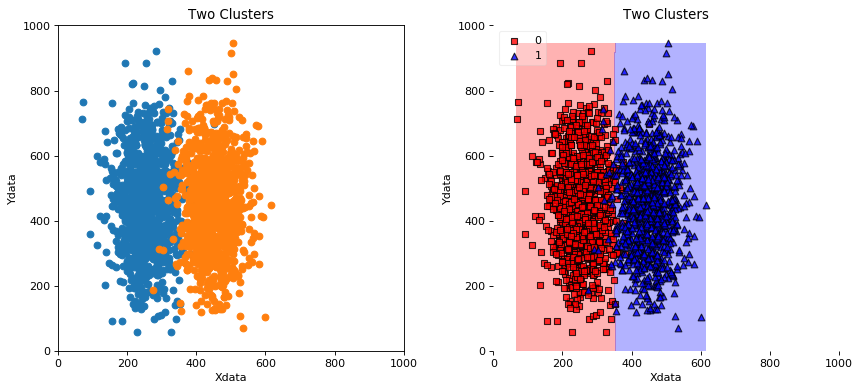

In [4]:
# Create Cluster one
np.random.seed(19680801) # Fix seed for reproducibility
Amu, Asigma = 250, 50 # mean and standard deviation
Bmu, Bsigma = 450, 150 # mean and standard deviation
A = np.random.normal(Amu, Asigma, 1000).astype(np.integer)
B = np.random.normal(Bmu, Bsigma, 1000).astype(np.integer)

# Create Cluster two, shifted to the right
np.random.seed(336808341) # Fix seed for reproducibility
A2 = np.random.normal(Amu, Asigma, 1000).astype(np.integer) + 200
B2 = np.random.normal(Bmu, Bsigma, 1000).astype(np.integer)

# Create figure layout for two figures
flist = createfigure()

# Scatterplot the two clusters
plt.sca(flist[1]) # Set current axes (subplot) to the first one
for X_Data, Y_Data in zip([A,A2], (B,B2)):
    plt.scatter(X_Data, Y_Data)

# Run the GaussianNB Classifier on them
# Combine first cluster and second cluster into a long dataset
# Combine column A and B and A2 and B2, then stack them vertically over each other.
X = np.append(np.column_stack((A,B)), np.column_stack((A2,B2)), axis = 0)
# Label first 1000 points as 0, next 1000 as 1
Y = np.append(np.zeros(1000), np.ones(1000))

clf1=GaussianNB()
clf1.fit(X, Y);
print(clf1.score(X, Y))

plt.sca(flist[2]) # Use second subplot
#f2 = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
plot_decision_regions(X=X, y=Y.astype(np.integer), clf=clf1, legend=2, res = 1.0) # Returns nothing useful

# Set titles, axes etc.
for fig in (flist[1], flist[2]):
    #plt.figure(fig.number)
    fig.set_xlabel('Xdata') # Operates on given subplot
    fig.set_ylabel('Ydata')
    fig.set_title('Two Clusters')
    #ax = fig.gca()
    fig.set_xlim(0,1000)
    fig.set_ylim(0,1000)
    

plt.show()


## Two clusters with right cluster tilted to the left

Score for Classification:  60.9 %
Means: =>
 [[ 253.016  450.638]
 [ 268.836  452.302]]
Sigmas: =>
 [[  50.17596801  147.59731359]
 [  77.14606358  146.11797568]]


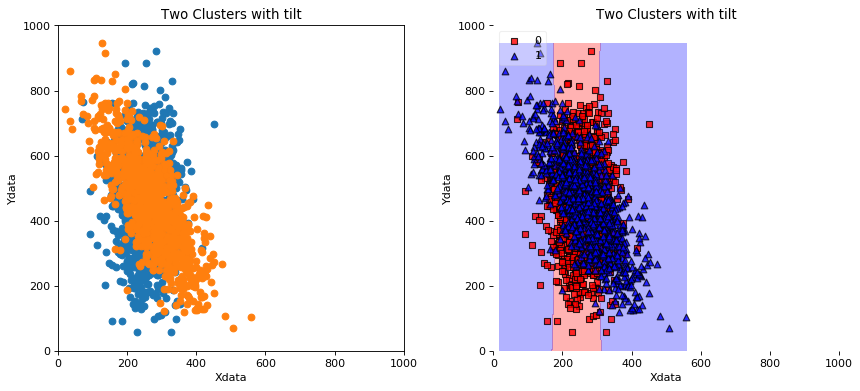

In [5]:
# Tilt right cluster
A3 = (A2 - (400 * B2 / 1000)).astype(np.integer)

# Create figure layout for two figures
flist = createfigure()

# Scatterplot the two clusters
plt.sca(flist[1]) # Set current axes (subplot) to the first one
for X_Data, Y_Data in zip([A,A3], (B,B2)):
    plt.scatter(X_Data, Y_Data)

X = np.append(np.column_stack((A,B)), np.column_stack((A3,B2)), axis = 0)
# Label first 1000 points as 0, next 1000 as 1
Y = np.append(np.zeros(1000), np.ones(1000)).astype(np.integer)

clf1.fit(X, Y); #.fit has refit = true => throws away old training
print('Score for Classification: ', clf1.score(X, Y)*100, '%')
print('Means: =>\n', clf1.theta_)
print('Sigmas: =>\n', np.sqrt(clf1.sigma_))
plt.sca(flist[2]) # Use second subplot
plot_decision_regions(X=X, y=Y, clf=clf1, legend=2, res = 1.0)

# Set titles, axes etc.
for fig in (flist[1], flist[2]):
    #plt.figure(fig.number)
    fig.set_xlabel('Xdata') # Operates on given subplot
    fig.set_ylabel('Ydata')
    fig.set_title('Two Clusters with tilt')
    #ax = fig.gca()
    fig.set_xlim(0,1000)
    fig.set_ylim(0,1000)

plt.show()
X = []
Y = []

## Break two clusters into top half and bottom half

Below, we take the top half of both the clusters and classify seperately, and then take the bottom half of the clusters and classify seperately.

The average score above was 60.9%.
The score for the top half is 59.8% and the bottom half is 70.3%

Score for Top Half Classification:  59.8 %
Classifier Means: =>
 [[ 252.462  571.116]
 [ 223.254  568.334]]
Classifier Sigmas: =>
 [[ 52.11986726  86.93856769]
 [ 62.3862925   88.23900754]]
Score for Bottom Half Classification:  70.3 %
Classifier Means: =>
 [[ 253.57   330.16 ]
 [ 314.418  336.27 ]]
Classifier Sigmas: =>
 [[ 48.14728557  83.55670175]
 [ 62.09302121  89.37534955]]


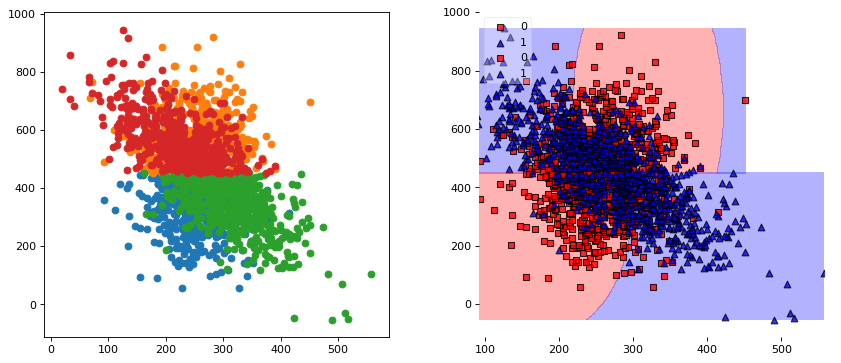

In [6]:
# Create figure layout for two figures
flist = createfigure()

# Sort the data by B values so we can split into top half and bottom half
X_Sort = np.column_stack((A,B))
X_Sort.view('int,int').sort(order=['f1'], axis=0)
X2_Sort = np.column_stack((A3,B2))
X2_Sort.view('int,int').sort(order=['f1'], axis=0)

# Show Scatterplot
plt.sca(flist[1]) 
plt.scatter(X_Sort[:500,0], X_Sort[:500,1])
plt.scatter(X_Sort[500:,0], X_Sort[500:,1])
plt.scatter(X2_Sort[:500,0], X2_Sort[:500,1])
plt.scatter(X2_Sort[500:,0], X2_Sort[500:,1])

# Classify top half of Data
X = np.append(X_Sort[500:,:], X2_Sort[500:,:], axis = 0)
# Label points
Y = np.append(np.zeros(500), np.ones(500)).astype(np.integer)

clf1.fit(X, Y); #.fit has refit = true => throws away old training
print('Score for Top Half Classification: ', clf1.score(X, Y)*100, '%')
print('Classifier Means: =>\n', clf1.theta_)
print('Classifier Sigmas: =>\n', np.sqrt(clf1.sigma_))
plt.sca(flist[2]) # Use second subplot
plot_decision_regions(X=X, y=Y, clf=clf1, legend=2, res = 1.0)

# flist2 = createfigure() # Disable comment if you want bottom half on new figure and use flist2 for .csa below

# Classify bottom half of Data
X = np.append(X_Sort[:500,:], X2_Sort[:500,:], axis = 0)
# Label points
Y = np.append(np.zeros(500), np.ones(500)).astype(np.integer)

clf1.fit(X, Y); #.fit has refit = true => throws away old training
print('Score for Bottom Half Classification: ', clf1.score(X, Y)*100, '%')
print('Classifier Means: =>\n', clf1.theta_)
print('Classifier Sigmas: =>\n', np.sqrt(clf1.sigma_))
plt.sca(flist[2]) # Use second subplot
plot_decision_regions(X=X, y=Y, clf=clf1, legend=2, res = 1.0)

print('\x1b[1;31m'+'Warning: The two plots in subfig(2) are incorrectly overlapped. Plot graph 2 seperatly for accuracy'+'\x1b[0m')
X = []
Y = []
plt.show()

## Original clusters with tilt to the right

Score  1.0


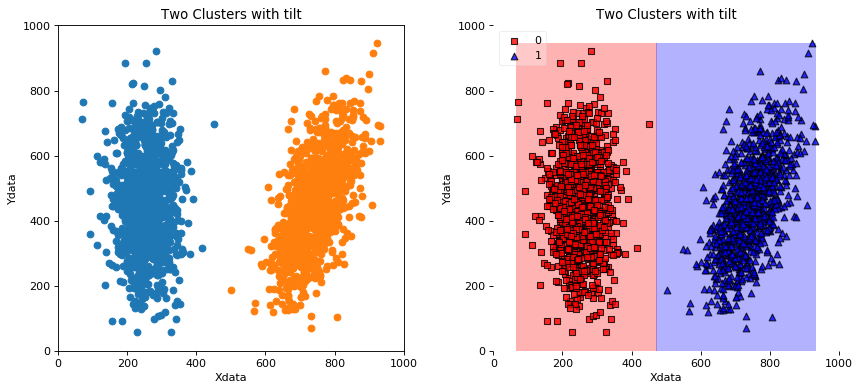

In [11]:
flist = createfigure()

# Scatterplot the two clusters
A3 = A2 + 200 + ((250 * B2 / 1000) - 20)
plt.sca(flist[1]) # Set current axes (subplot) to the first one
for X_Data, Y_Data in zip([A,A3], (B,B2)):
    plt.scatter(X_Data, Y_Data)

X = np.append(np.column_stack((A,B)), np.column_stack((A3,B2)), axis = 0)
# Label first 1000 points as 0, next 1000 as 1
Y = np.append(np.zeros(1000), np.ones(1000)).astype(np.integer)

clf1.fit(X, Y);
print('Score ', clf1.score(X, Y))
plt.sca(flist[2])
plot_decision_regions(X=X, y=Y, clf=clf1, legend=2, res = 1.0)

# Set titles, axes etc.
for fig in (flist[1], flist[2]):
    fig.set_xlabel('Xdata') # Operates on given subplot
    fig.set_ylabel('Ydata')
    fig.set_title('Two Clusters with tilt')
    fig.set_xlim(0,1000)
    fig.set_ylim(0,1000)

plt.show()